# Lecture 7 Workbook
## Power
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [1]:
%matplotlib inline
import os
import numpy as np
from itertools import islice
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f, t
from scipy.stats import ttest_ind
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D



course_data = 'https://github.com/opherdonchin/StatisticalComputationAndAnalysis/raw/main/Data/'



In [2]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

This is the seed for the random number generator. Graphs for the course will be generated with seed 367 (for BME). You can change it or use 'shuffle' to get different pseudo-random numbers each time.

In [3]:
np.random.seed(367)

### Scatterplot of bivariate data

In [4]:
cblm_data = pd.read_csv(os.path.join(course_data, 'cerebellar_volumes.csv'))

Text(0, 0.5, 'Cerebellar Volume (% of TICV)')

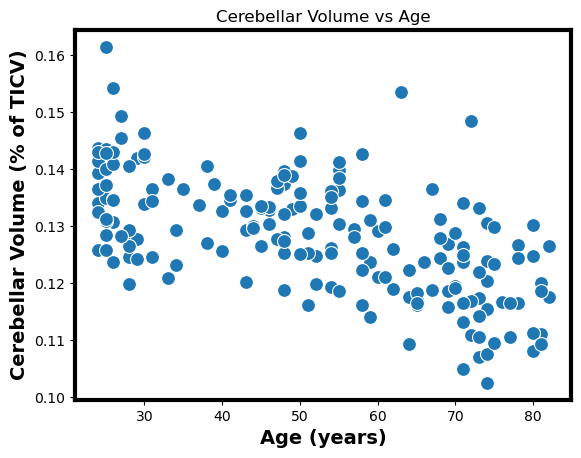

In [5]:
# Filter data where age is between 24 and 82
filtered_data = cblm_data[(cblm_data['Age'] >= 24) & (cblm_data['Age'] <= 82)]

# Plotting using Seaborn
sns.scatterplot(x='Age', y='TCV_Corr', data=filtered_data)
plt.title('Cerebellar Volume vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Cerebellar Volume (% of TICV)')

## Solving for the regression coefficients

### Functions to calculate estimators for regerssion parameters

In [6]:
def calc_b1(x, y):
    """
    Calculate the coefficient b1 in the linear regression equation.

    Args:
        X (ndarray): Input array of predictor variable.
        Y (ndarray): Input array of response variable.

    Returns:
        float: Coefficient b1.
    """
    X = np.hstack((np.ones((x.shape[0], 1)), np.array(x).reshape(-1,1)))
    b = np.linalg.inv(X.T @ X) @ X.T @ y
    return b[1]

def calc_b0(x, y):
    """
    Calculate the coefficient b0 in the linear regression equation.

    Args:
        X (ndarray): Input array of predictor variable.
        Y (ndarray): Input array of response variable.

    Returns:
        float: Coefficient b0.
    """
    X = np.hstack((np.ones((x.shape[0], 1)), np.array(x).reshape(-1,1)))
    b = np.linalg.inv(X.T @ X) @ X.T @ y
    return b[0]

def calc_yhat(x, b0, b1):
    """
    Calculate the predicted values (Yhat) based on the linear regression equation.

    Args:
        X (ndarray): Input array of predictor variable.
        b0 (float): Coefficient b0.
        b1 (float): Coefficient b1.

    Returns:
        ndarray: Predicted values (Yhat).
    """
    Yhat = b1 * x + b0
    return Yhat

def calc_syx(x, y, b0, b1):
    """
    Calculate the standard error of the estimate (SYX) for linear regression.

    Args:
        X (ndarray): Input array of predictor variable.
        Y (ndarray): Input array of response variable.
        b0 (float): Coefficient b0.
        b1 (float): Coefficient b1.

    Returns:
        float: Standard error of the estimate (SYX).
    """
    residuals = y - calc_yhat(x, b0, b1)
    syx = np.sum(residuals**2) / (x.shape[0] - 2)
    return syx


### Showing the regression fit

Text(0, 0.5, 'Cerebellar Volume (% of TICV)')

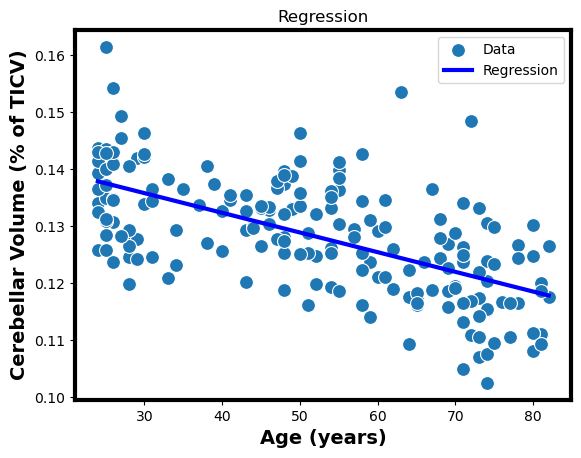

In [7]:
# Plotting using Seaborn
sns.scatterplot(x='Age', y='TCV_Corr', data=filtered_data, label='Data')

# Calculate regression line coefficients
b1 = calc_b1(filtered_data['Age'], filtered_data['TCV_Corr'])
b0 = calc_b0(filtered_data['Age'], filtered_data['TCV_Corr'])

# Add regression line
x_range = np.linspace(filtered_data['Age'].min(), filtered_data['Age'].max(), 100)
y_range = calc_yhat(x_range, b0, b1)
plt.plot(x_range, y_range, color='blue', label='Regression')

plt.legend()

# Set plot labels and title
plt.title('Regression')
plt.xlabel('Age (years)')
plt.ylabel('Cerebellar Volume (% of TICV)')


### Showing what a residual is

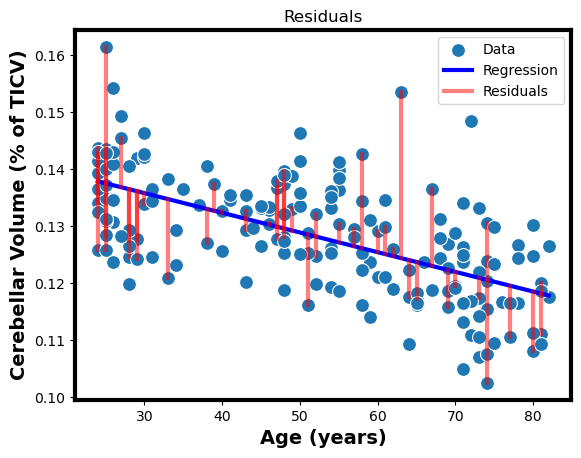

In [8]:
# Plotting using Seaborn
sns.scatterplot(x='Age', y='TCV_Corr', data=filtered_data, label='Data')

# Calculate regression line coefficients
b1 = calc_b1(filtered_data['Age'], filtered_data['TCV_Corr'])
b0 = calc_b0(filtered_data['Age'], filtered_data['TCV_Corr'])

# Add regression line
x_range = np.linspace(filtered_data['Age'].min(), filtered_data['Age'].max(), 100)
y_range = calc_yhat(x_range, b0, b1)
plt.plot(x_range, y_range, color='blue', label='Regression')

# Calculate residuals
residuals = filtered_data['TCV_Corr'] - calc_yhat(filtered_data['Age'], b0, b1)
x_coords = filtered_data['Age']
y_coords = filtered_data['TCV_Corr']

# Select 10 elements from the zip output
n_lines = 50
# Add red lines connecting the selected residuals
for x, y, res in islice(zip(x_coords, y_coords, residuals), n_lines):
    plt.plot([x, x], [y, y - res], 'r-', alpha=0.5, label="Residuals")

# Make a legend skipping the duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set plot labels and title
plt.title('Residuals')
plt.xlabel('Age (years)')
plt.ylabel('Cerebellar Volume (% of TICV)')

plt.show()


### Distance from data to model

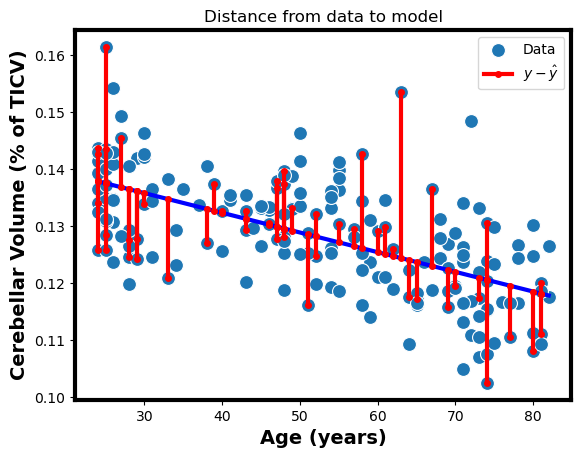

In [20]:
# Plotting using Seaborn
sns.scatterplot(x='Age', y='TCV_Corr', data=filtered_data, label='Data')

# Calculate regression line coefficients
b1 = calc_b1(filtered_data['Age'], filtered_data['TCV_Corr'])
b0 = calc_b0(filtered_data['Age'], filtered_data['TCV_Corr'])

# Add regression line
x_range = np.linspace(filtered_data['Age'].min(), filtered_data['Age'].max(), 100)
y_range = calc_yhat(x_range, b0, b1)
plt.plot(x_range, y_range, color='blue')

# Calculate residuals
residuals = filtered_data['TCV_Corr'] - calc_yhat(filtered_data['Age'], b0, b1)
x_coords = filtered_data['Age']
y_coords = filtered_data['TCV_Corr']

# Select 10 elements from the zip output
n_lines = 50
# Add red lines connecting the selected residuals
for x, y, res in islice(zip(x_coords, y_coords, residuals), n_lines):
    plt.plot([x, x], [y, y - res], 'ro-', markersize=4, label="$y-\hat{y}$")

# Make a legend skipping the duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set plot labels and title
plt.title('Distance from data to model')
plt.xlabel('Age (years)')
plt.ylabel('Cerebellar Volume (% of TICV)')

plt.show()

### Plot from data to mean

Text(0, 0.5, 'Cerebellar Volume (% of TICV)')

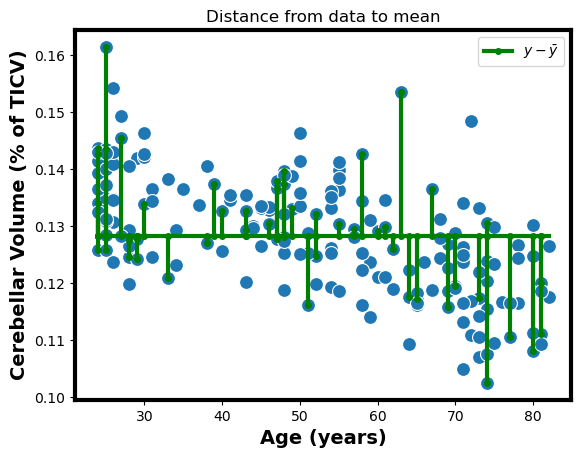

In [19]:
# Plotting using Seaborn
sns.scatterplot(x='Age', y='TCV_Corr', data=filtered_data)

x_coords = filtered_data['Age']
y_coords = filtered_data['TCV_Corr']

# Select 10 elements from the zip output
n_lines = 50
# Add green lines connecting the selected residuals
mean_y = np.mean(y_coords)
for x, y in islice(zip(x_coords, y_coords), n_lines):
    plt.plot([x, x], [y, mean_y], 'go-', alpha=1, markersize=4, label=r"$y-\bar{y}$")
    
plt.plot([np.min(x_coords), np.max(x_coords)], [mean_y, mean_y], 'g-')

# Make a legend skipping the duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set plot labels and title
plt.title('Distance from data to mean')
plt.xlabel('Age (years)')
plt.ylabel('Cerebellar Volume (% of TICV)')

### Plot distance from model to mean

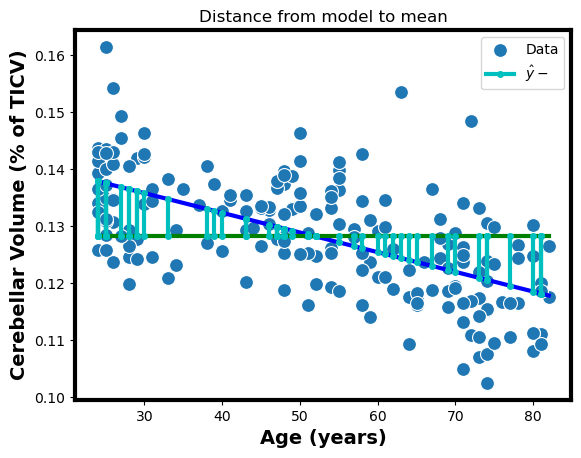

In [24]:
# Plotting using Seaborn
sns.scatterplot(x='Age', y='TCV_Corr', data=filtered_data, label='Data')

# Calculate regression line coefficients
x_coords = filtered_data['Age']
y_coords = filtered_data['TCV_Corr']
b1 = calc_b1(x_coords, y_coords)
b0 = calc_b0(x_coords, y_coords)

# Add regression line
x_range = np.linspace(filtered_data['Age'].min(), filtered_data['Age'].max(), 100)
y_range = calc_yhat(x_range, b0, b1)
plt.plot(x_range, y_range, color='blue')

mean_y = np.mean(y_coords)    
plt.plot(x_range, np.full(shape=x_range.shape, fill_value=mean_y), 'g-')

n_lines = 50
yhat = calc_yhat(x_coords, b0, b1)
for x, y1 in islice(zip(x_coords, yhat), n_lines):
    plt.plot([x, x], [mean_y, y1], 'co-', markersize=4, label="$\hat{y}-\bar{y}$")

# Make a legend skipping the duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set plot labels and title
plt.title('Distance from model to mean')
plt.xlabel('Age (years)')
plt.ylabel('Cerebellar Volume (% of TICV)')

plt.show()

### Create an interactive widget to show how residuals correlate with model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

def generate_data():
    np.random.seed(0)
    x = np.linspace(-10, 10, 100)
    y = 2 * x + np.random.normal(0, 3, len(x))
    return x, y

x, y = generate_data()

def calculate_residuals(slope):
    # Calculate regression line parameters
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope_regression = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

    # Calculate residuals
    residuals = y - (slope * x + y_mean - slope_regression * x_mean)
    sum_squared_residuals = np.sum(residuals**2)

    return residuals, sum_squared_residuals

def calculate_regression(slope):
    # Calculate regression line parameters
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope_regression = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

    # Plot regression line with modified slope
    y_regression = slope * x + y_mean - slope_regression * x_mean
    return y_regression


def calculate_correlation(slope):
    # Get residuals
    residuals, ss_residuals = calculate_residuals(slope)
    y_regression = calculate_regression(slope)
    return np.corrcoef(residuals, y_regression)[0, 1]

slope_min = 0.5
slope_max = 3.5
slope_range = np.linspace(slope_min, slope_max, 100)
sum_squared_residuals = [calculate_residuals(s)[1] for s in slope_range]
correlation_residual_y_regression = [calculate_correlation(s) for s in slope_range]



def plot_line_with_scatter(slope):
    x, y = generate_data()

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 8))

    # Plot scatter plot and regression line
    ax1.scatter(x, y, label='Data')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')

    # Calculate regression line parameters
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope_regression = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

    # Plot regression line with modified slope
    y_regression = slope * x + y_mean - slope_regression * x_mean
    ax1.plot(x, y_regression, color='red', label='Regression Line')
    
    ax1.set_title(f'Slope = {slope:.2f}')
    ax1.legend()
    ax1.grid(True)

    # Plot residuals
    residuals = y - (slope * x + y_mean - slope_regression * x_mean)
    ax2.scatter(x, residuals, label='Residuals')
    ax2.axhline(0, color='black', linestyle='--')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Residuals')
    ax2.grid(True)

    # Plot sum squared residuals vs. slope
    ax3.plot(slope_range, sum_squared_residuals, label='Sum Squared Residuals')
    ax3.scatter(slope, calculate_residuals(slope)[1], color='red', s=100, label='Current Slope')
    ax3.set_xlabel('Slope')
    ax3.set_ylabel('Sum Squared Residuals')
    ax3.legend()
    ax3.grid(True)

    ax4.plot(slope_range, correlation_residual_y_regression, label='Correlation')
    ax4.scatter(slope, calculate_correlation(slope), color='red', s=100, label='Current Slope')
    ax4.set_xlabel('Slope')
    ax4.set_ylabel('Correlation')
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

slope_slider = FloatSlider(min=slope_min, max=slope_max, step=0.1, value=2.8, description='Slope')
interactive_plot = interactive(plot_line_with_scatter, slope=slope_slider)
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot


interactive(children=(FloatSlider(value=2.8, description='Slope', max=3.5, min=0.5), Output(layout=Layout(heig…

## Example of multivariate regression

In [115]:
data = pd.read_csv('d-02.dat', skiprows=3, delim_whitespace=True, header=None)

# Assign column names
data.columns = ['Breast Cancer deaths/100,000', 'Male Lung Cancer deaths/100,000', 'Animal Fat g/day']


In [116]:
BreastCancer = data.iloc[:, 0]
LungCancer = data.iloc[:, 1]
Fat = data.iloc[:, 2]
NumData = len(BreastCancer)
MinBreast = np.min(BreastCancer)
MaxBreast = np.max(BreastCancer)
ColorBreast = np.ones((NumData, 3)) * np.array([1, 0, 0]) + \
  np.array(((BreastCancer - MinBreast) / (MaxBreast - MinBreast))).reshape(-1,1) * np.array([-1, 0, 1])

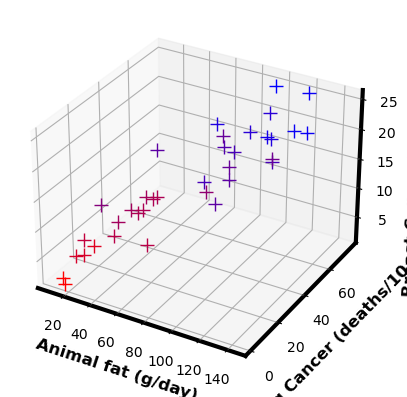

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(NumData):
    ax.plot(Fat[i:i+1], LungCancer[i:i+1], BreastCancer[i:i+1], '+', color=ColorBreast[i])

ax.set_xlabel('Animal fat (g/day)', fontsize=12)
ax.set_ylabel('Lung Cancer (deaths/10^5)', fontsize=12)
ax.set_zlabel('Breast Cancer (deaths/10^5)', fontsize=12)
ax.grid(True)
plt.show()


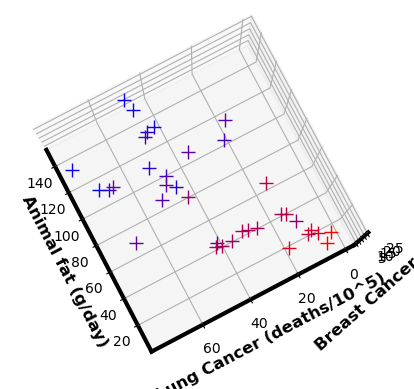

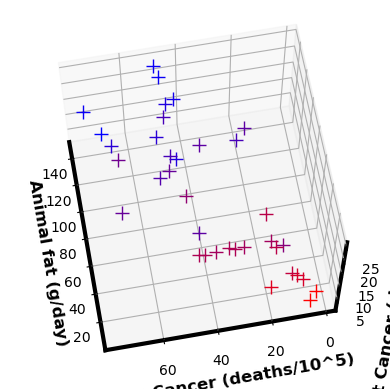

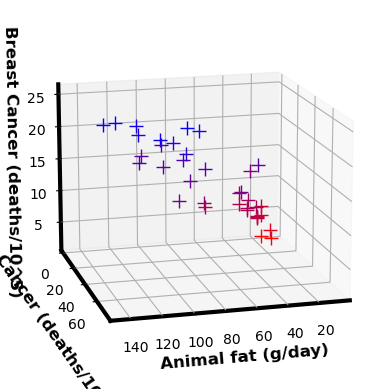

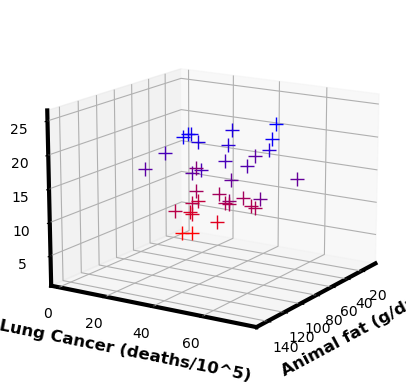

In [118]:
def copy_figure_with_camera_position(ax, position, up_vector):
    fig_copy = plt.figure()
    ax_copy = fig_copy.add_subplot(111, projection='3d')
    for i in range(NumData):
        ax_copy.plot(Fat[i:i+1], LungCancer[i:i+1], BreastCancer[i:i+1], '+', color=ColorBreast[i])
    ax_copy.set_xlabel('Animal fat (g/day)', fontsize=12)
    ax_copy.set_ylabel('Lung Cancer (deaths/10^5)', fontsize=12)
    ax_copy.set_zlabel('Breast Cancer (deaths/10^5)', fontsize=12)
    ax_copy.view_init(elev=position[2], azim=position[0])
    ax_copy.set_proj_type('persp')
    plt.show()

# First camera position
copy_figure_with_camera_position(ax, [-207.6997, -654.7099, 84.4887], [0.4024, 0.9725, 0.9531])

# Second camera position
copy_figure_with_camera_position(ax, [-1270.4, -105.8, 65.5], [1.4884, 0.1560, 0.9730])

# Third camera position
copy_figure_with_camera_position(ax, [75.0, -816.0254, 15.0], [0, 0, 1])

# Fourth camera position
copy_figure_with_camera_position(ax, [1832.1, 40.0, 15.0], [0, 0, 1])


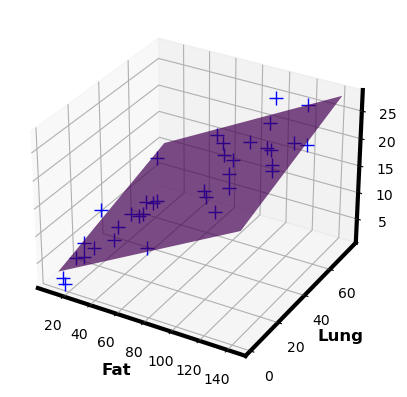

In [119]:
# Helper function to find regression coefficients
def find_reg(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Regression calculation
X = np.column_stack((np.ones(NumData), Fat, LungCancer))
y = BreastCancer
b = find_reg(X, y)

# Function to generate predicted values
def YHat(F, L):
    return np.column_stack((np.ones(len(F)), F, L)) @ b

MinFat = np.min(Fat)
MaxFat = np.max(Fat)
MinLung = np.min(LungCancer)
MaxLung = np.max(LungCancer)
YHatFullRange = np.array([
    YHat(np.array([MinFat]), np.array([MinLung])),
    YHat(np.array([MaxFat]), np.array([MinLung])),
    YHat(np.array([MinFat]), np.array([MaxLung])),
    YHat(np.array([MaxFat]), np.array([MaxLung]))
]).reshape(2, 2)

# Plotting regression surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(Fat, LungCancer, BreastCancer, 'b+')
F_mesh, L_mesh = np.meshgrid([MinFat, MaxFat], [MinLung, MaxLung])
ax.plot_surface(F_mesh, L_mesh, YHatFullRange, alpha=0.7, cmap='viridis')

ax.set_xlabel('Fat', fontsize=12)
ax.set_ylabel('Lung', fontsize=12)
ax.set_zlabel('Breast', fontsize=12)
ax.grid(True)
plt.show()


Text(0, 0.5, 'Probability density')

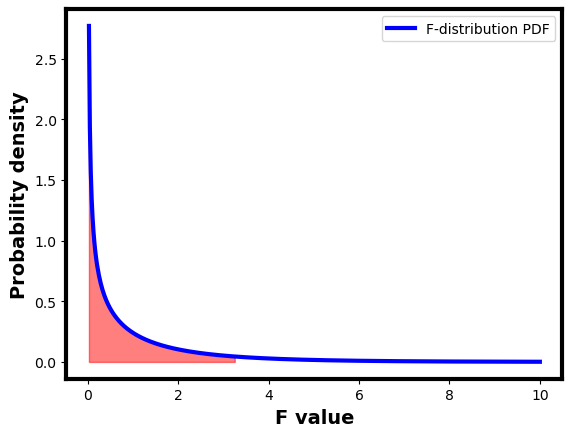

In [120]:
y_hat = YHat(Fat, LungCancer)
SSres = np.sum((y - y_hat).T*(y-y_hat))
SSreg = np.sum((y_hat - np.mean(y)) ** 2)
MSres = SSres / (NumData - 2)
MSreg = SSreg / 1
F_value = MSreg / MSres

# Plotting the F distribution
dfn, dfd = 1, NumData - 2
F = np.linspace(0, 10, 500)
Fpdf = f.pdf(x, dfn, dfd)

fig, ax = plt.subplots()
ax.plot(F, Fpdf, 'b-', label='F-distribution PDF')
ax.fill_between(F, Fpdf, where=(x <= f.ppf(0.92, dfn, dfd)), color='red', alpha=0.5)
# ax.axvline(F_value, color='r', linestyle='--', label=f'F value: {F_value:.2f}')
ax.legend()
ax.set_xlabel('F value')
ax.set_ylabel('Probability density')

## F test

In [121]:
# Function to find regression coefficients
def find_reg(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

### Law school data

In [122]:
# Law school data
LSAT = np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594])
GPA = np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 2.96])
NumData = len(LSAT)
Bivariate = np.column_stack((LSAT, GPA))
Bivariate


array([[576.  ,   3.39],
       [635.  ,   3.3 ],
       [558.  ,   2.81],
       [578.  ,   3.03],
       [666.  ,   3.44],
       [580.  ,   3.07],
       [555.  ,   3.  ],
       [661.  ,   3.43],
       [651.  ,   3.36],
       [605.  ,   3.13],
       [653.  ,   3.12],
       [575.  ,   2.74],
       [545.  ,   2.76],
       [572.  ,   2.88],
       [594.  ,   2.96]])

## Load data
Load data on cerebellar volumes

In [123]:
cblm_data = pd.read_csv(os.path.join(course_data, 'cerebellar_volumes.csv'))

### Regression coefficients

In [124]:
# Calculate the regression coefficients
X = np.column_stack((np.ones(NumData), LSAT))
y = GPA

b = find_reg(X, y)

b1 = b[1]
b0 = b[0]

# Function to generate the fit value
GPAhat = lambda X: b1 * X + b0

SSres = np.sum((GPA - GPAhat(LSAT)) ** 2)
SSreg = np.sum((GPAhat(LSAT) - np.mean(GPA)) ** 2)
MSres = SSres / (NumData - 2)
MSreg = SSreg / 1
F = MSreg / MSres
p = 1 - f.cdf(F, 1, NumData - 2)
pcrit = f.ppf(0.95, 1, NumData - 2)

print(f"{b0=:.2f}, {b1=:.2f}")
print(f"{SSres=:.2f}, {SSreg=:.2f}, {MSres=:.2f}, {MSreg=:.2f}")
print(f"{F=:.2f}, {p=:.2f}, {pcrit=:.2f}")


b0=0.38, b1=0.00
SSres=0.33, SSreg=0.50, MSres=0.03, MSreg=0.50
F=19.73, p=0.00, pcrit=4.67


### Plotting regression

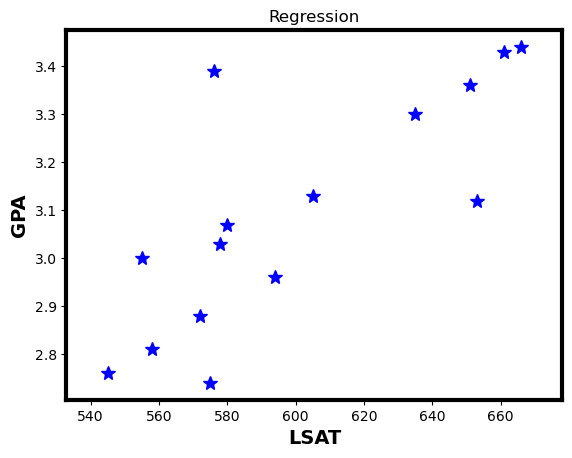

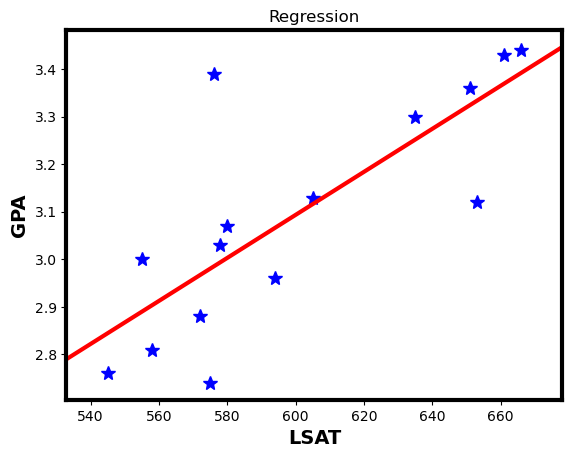

In [125]:
LSATRange = max(LSAT) - min(LSAT)
LSATLim = [min(LSAT), max(LSAT)] + np.array([-1, 1]) * 0.1 * LSATRange
GPALim = GPAhat(LSATLim)

plt.plot(LSAT, GPA, 'b*')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.title('Regression')
plt.xlim(LSATLim)
plt.show()

plt.plot(LSAT, GPA, 'b*', LSATLim, GPALim, 'r-')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.title('Regression')
plt.xlim(LSATLim)
plt.show()


### Resiudals and additional plots

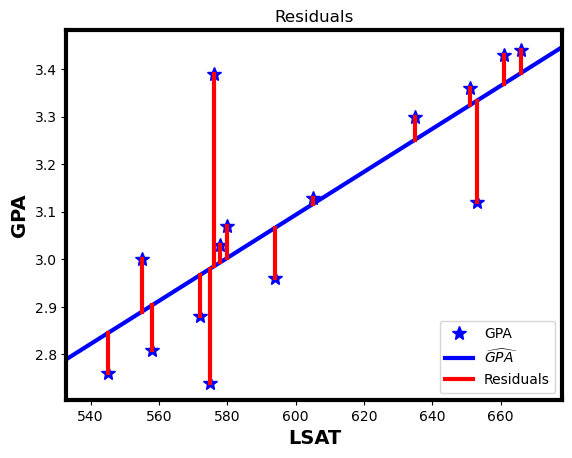

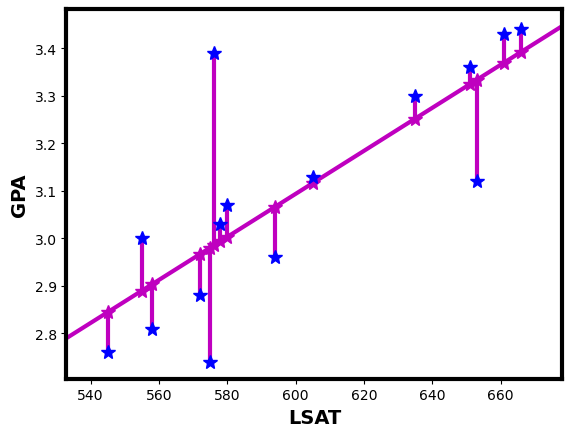

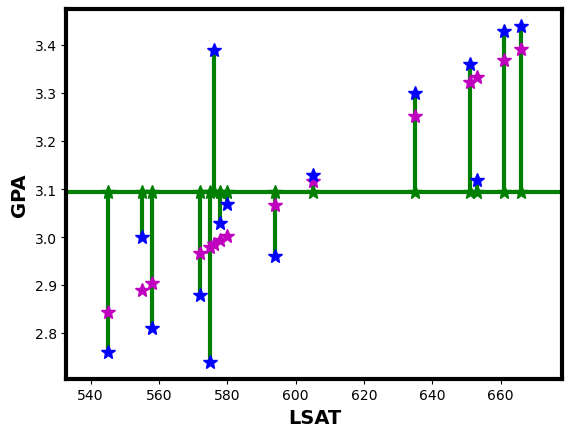

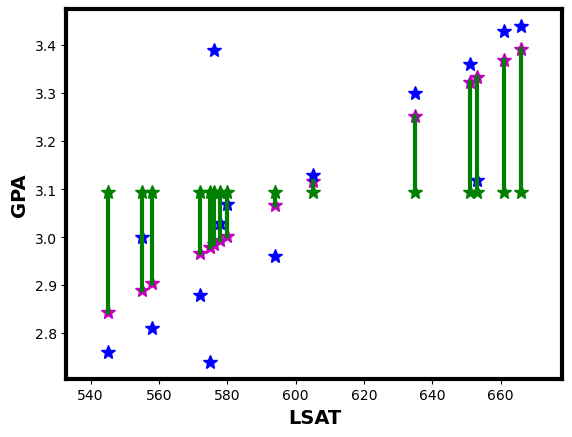

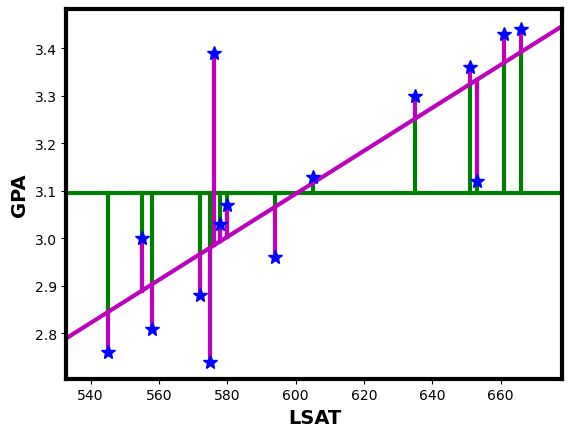

In [126]:
LSAT_yyhat = np.column_stack((LSAT, LSAT, np.nan * np.ones_like(LSAT))).flatten()
GPA_yyhat = np.column_stack((GPAhat(LSAT), GPA, np.nan * np.ones_like(GPA))).flatten()
GPA_ybaryhat = np.column_stack((np.mean(GPA) * np.ones_like(GPA), GPAhat(LSAT), np.nan * np.ones_like(GPA))).flatten()
GPA_ybary = np.column_stack((np.mean(GPA) * np.ones_like(GPA), GPA, np.nan * np.ones_like(GPA))).flatten()

GPAbar = [np.mean(GPA), np.mean(GPA)]

plt.plot(LSAT, GPA, 'b*', LSATLim, GPALim, 'b-', LSAT_yyhat, GPA_yyhat, 'r-')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.title('Residuals')
plt.xlim(LSATLim)
plt.legend(['GPA', '$\\widehat{GPA}$', 'Residuals'], loc='lower right')
plt.show()

plt.plot(LSATLim, GPALim, 'm-', LSAT_yyhat, GPA_yyhat, 'm-', LSAT, GPAhat(LSAT), 'm*', LSAT, GPA, 'b*')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.xlim(LSATLim)
plt.show()

plt.plot(LSATLim, GPAbar, 'g-', LSAT_yyhat, GPA_ybary, 'g-', LSAT, np.mean(GPA) * np.ones_like(GPA), 'g*', LSAT, GPAhat(LSAT), 'm*', LSAT, GPA, 'b*')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.xlim(LSATLim)
plt.show()

plt.plot(LSAT, np.mean(GPA) * np.ones_like(GPA), 'g*', LSAT, GPAhat(LSAT), 'm*', LSAT, GPA, 'b*', LSAT_yyhat, GPA_ybaryhat, 'g-')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.xlim(LSATLim)
plt.show()

plt.plot(LSATLim, GPAbar, 'g-', LSAT_yyhat, GPA_ybaryhat, 'g-', LSATLim, GPALim, 'm-', LSAT_yyhat, GPA_yyhat, 'm-', LSAT, GPA, 'b*')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.xlim(LSATLim)
plt.show()


## Confidence intervaland acceptance region

In [127]:
N = 166
DBMD = norm.rvs(loc=-1.49, scale=2.67, size=N)

array([-7.98533054, -7.33677706, -6.68822358, -6.0396701 , -5.39111661,
       -4.74256313, -4.09400965, -3.44545617, -2.79690269, -2.1483492 ,
       -1.49979572, -0.85124224, -0.20268876,  0.44586472,  1.0944182 ,
        1.74297169,  2.39152517,  3.04007865,  3.68863213,  4.33718561,
        4.98573909])

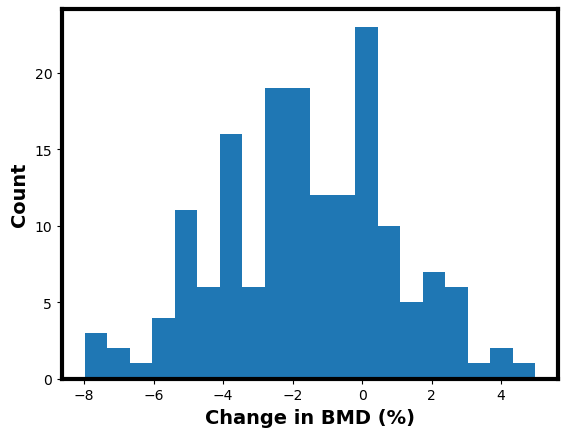

In [128]:
def plot_sample():
  counts, bins, patches = plt.hist(DBMD, bins=20, label="Data")
  plt.xlabel('Change in BMD (%)')
  plt.ylabel('Count')
  return bins

plot_sample()

In [129]:
mean_DBMD = np.mean(DBMD)
std_DBMD = np.std(DBMD)
se_DBMD = std_DBMD / np.sqrt(N)

print(mean_DBMD)
print(std_DBMD)
print(se_DBMD)

-1.6021920925815543
2.5424692236313926
0.19733388245136774


### Add null model to data

Effect size = -0.63


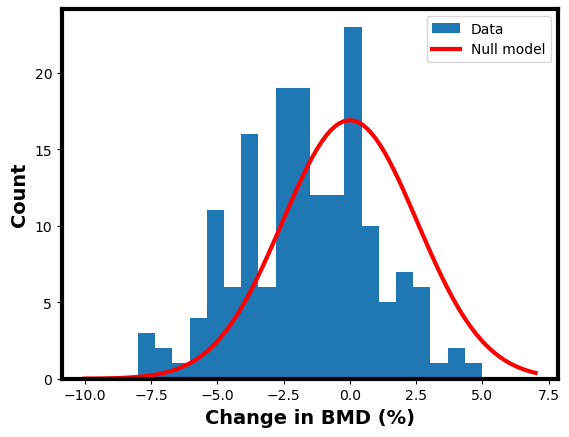

In [130]:
null_mu = 0

effectSize = mean_DBMD/std_DBMD
print(f'Effect size = {effectSize:.2f}')

def plot_sample_plus_null():
  bins = plot_sample()
  bin_width = bins[1]-bins[0]
  x = np.linspace(start=-10, stop=7, num=100)
  plt.plot(x, norm.pdf(x, null_mu, std_DBMD)*N*bin_width, 'r', label="Null model")

plot_sample_plus_null()
plt.legend()

### Add confidence interval to data and null model

-1.99 < $\mu$ < -1.22


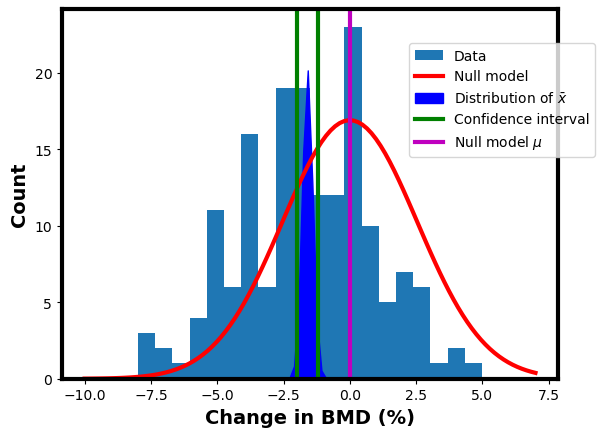

In [131]:
alpha = 0.05
z_alpha = norm.ppf([alpha/2, 1-alpha/2], 0, 1)

Conf = mean_DBMD + z_alpha*se_DBMD

plot_sample_plus_null()
x = np.linspace(start=-10, stop=7, num=100)
plt.fill_between(x, norm.pdf(x, mean_DBMD, se_DBMD)*10, color='b', label=r"Distribution of $\bar{x}$")
plt.axvline(Conf[0], color='g', linewidth=3, label="Confidence interval")
plt.axvline(Conf[1], color='g', linewidth=3)
plt.axvline(0, color='m', linewidth=3, label=r"Null model $\mu$")
plt.legend(loc=[0.7, 0.6])

print(f"{Conf[0]:.2f} < $\mu$ < {Conf[1]:.2f}")

### Plot the two distributions

In [132]:
# Create t-distribution objects
t_dist_ci = t(df=N-1, loc=mean_DBMD, scale=se_DBMD)
t_dist_acc = t(df=N-1, loc=0, scale=se_DBMD)

# Set significance level
alpha = 0.05

# Calculate critical values
ci = t_dist_ci.interval(1-alpha)
acceptance = t_dist_acc.interval(1-alpha)



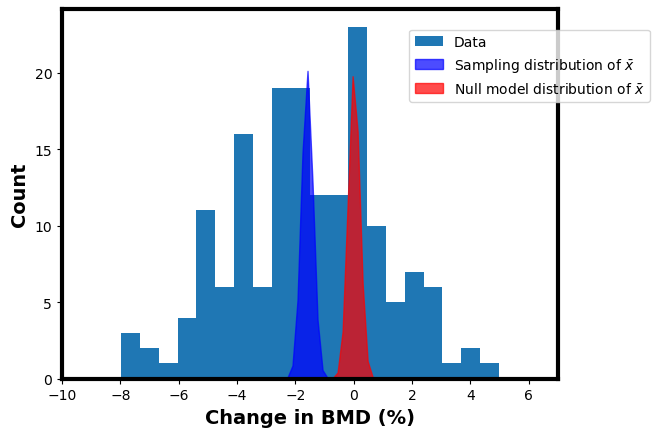

In [133]:
# Plot PDFs and shaded areas
plot_sample()
ax=plt.gca()
x = np.linspace(start=-10, stop=7, num=100)
aCI = ax.fill_between(x, t_dist_ci.pdf(x)*10, alpha=0.7, color='b', label=r'Sampling distribution of $\bar{x}$')
aAcc = ax.fill_between(x, t_dist_acc.pdf(x)*10, alpha=0.7, color='r', label=r'Null model distribution of $\bar{x}$')

# Set x-axis limit
ax.set_xlim([-10, 7])

# Add legend
ax.legend(loc=[0.7, 0.75])

### The confidence interval + null model value

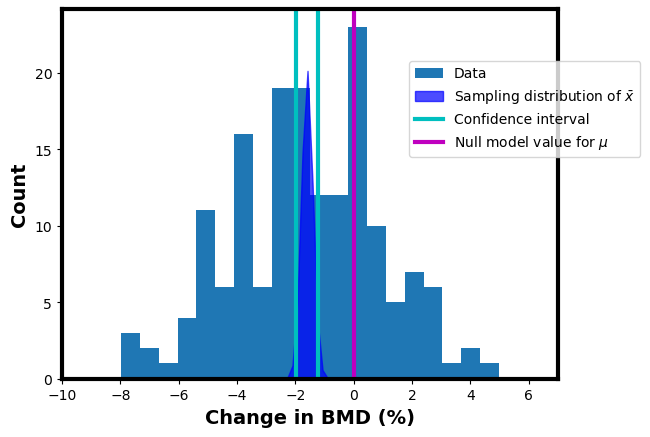

In [134]:
plot_sample()
ax=plt.gca()
x = np.linspace(start=-10, stop=7, num=100)
aCI = ax.fill_between(x, t_dist_ci.pdf(x)*10, alpha=0.7, color='b', label=r'Sampling distribution of $\bar{x}$')

# Plot critical value lines
ax.axvline(ci[0], color='c', linewidth=3, label='Confidence interval')
ax.axvline(ci[1], color='c', linewidth=3)
ax.axvline(0, color='m', linewidth=3, label='Null model value for $\mu$')

# Set x-axis limit
ax.set_xlim([-10, 7])

# Add legend
ax.legend(loc=[0.7, 0.6])

### The acceptance region and the true $\bar{x}$

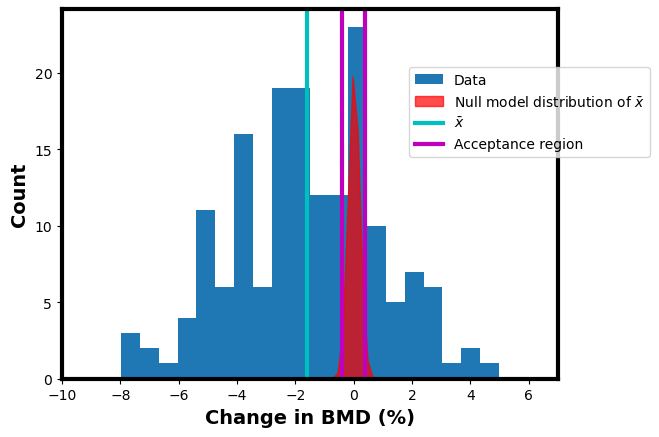

In [135]:
plot_sample()
ax=plt.gca()
x = np.linspace(start=-10, stop=7, num=100)
aAcc = ax.fill_between(x, t_dist_acc.pdf(x)*10, alpha=0.7, color='r', label=r'Null model distribution of $\bar{x}$')

# Plot critical value lines
ax.axvline(mean_DBMD, color='c', linewidth=3, label=r'$\bar{x}$')
ax.axvline(acceptance[0], color='m', linewidth=3, label='Acceptance region')
ax.axvline(acceptance[1], color='m', linewidth=3)

# Set x-axis limit
ax.set_xlim([-10, 7])

# Add legend
ax.legend(loc=[0.7, 0.6])

## Two sample CI

### Generate a sample of young and old people

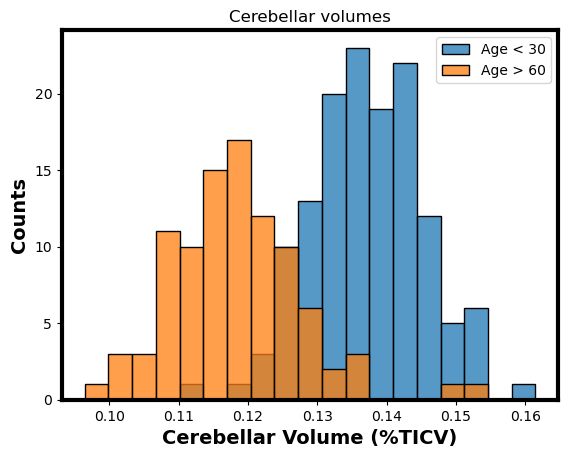

In [136]:
col_name = 'TCV_Corr'
# Define age limits and age text function
young_lims = [0, 30]
old_lims = [60, 120]

def lim_text(a,b):
    return f'Age {a}-{b}' if a>0 and b<120 else 'All ages' if a==0 and b==120 else f'Age > {a}' if b==120 else f'Age < {b}'

# Extract ages from dataframe
ages = cblm_data['Age']
young_index = np.where((young_lims[0] < ages) & (ages < young_lims[1]))[0]
old_index = np.where((old_lims[0] < ages) & (ages < old_lims[1]))[0]

# Extract cerebellar volume data
young_cbl_vol = cblm_data.loc[young_index, col_name]
old_cbl_vol = cblm_data.loc[old_index, col_name]

# Compute histogram and plot
cbl_vol_min = cblm_data[col_name].min()
cbl_vol_max = cblm_data[col_name].max()
cbl_vol_plot_x = np.linspace(cbl_vol_min, cbl_vol_max, 100)
cbl_vol_bin_x = np.linspace(cbl_vol_min, cbl_vol_max, 20)

sns.histplot(young_cbl_vol, bins=cbl_vol_bin_x, label=lim_text(*young_lims))
sns.histplot(old_cbl_vol, bins=cbl_vol_bin_x, label=lim_text(*old_lims))
plt.xlabel('Cerebellar Volume (%TICV)')
plt.ylabel('Counts')
plt.title('Cerebellar volumes')
plt.legend()
plt.show()



### Apply two sample t test


Text(0.2, 0.2, '$N_{1} = 95$\n$N_{2} = 136$\n$df = 229$\n$t = 1.97$\n$ci = [-0.021 -0.016]$')

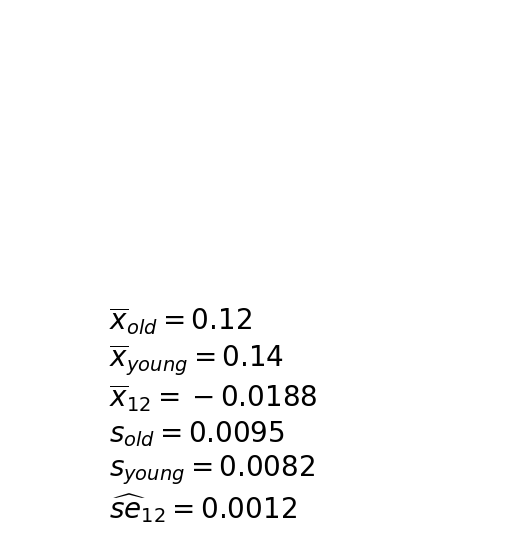

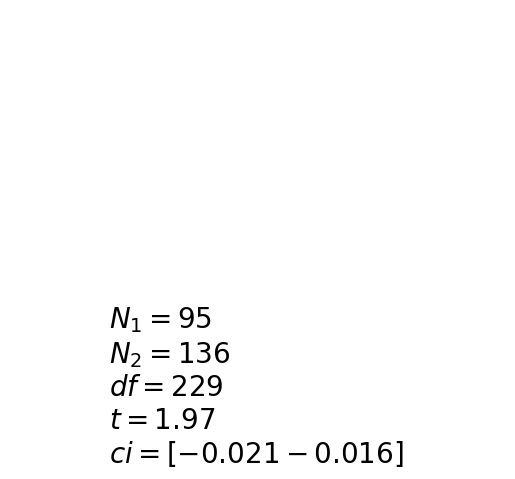

In [137]:
# Compute mean and variance of old and young cerebellar volume samples
mean1 = old_cbl_vol.mean()
mean2 = young_cbl_vol.mean()
mean12 = mean1 - mean2
v1 = old_cbl_vol.var()
v2 = young_cbl_vol.var()
N1 = len(old_cbl_vol)
N2 = len(young_cbl_vol)
se12 = np.sqrt(v1/N1 + v2/N2)

# Compute degrees of freedom and critical t-value
df = N1 + N2 - 2
t975 = t.ppf(0.975, df)

# Compute confidence interval
ci = mean12 + se12*t975*np.array([-1, 1])

# Plot results
fig, ax = plt.subplots()
ax.axis('off')
ax.annotate(f"$\overline{{x}}_{{old}} = {mean1:.2f}$\n"
            f"$\overline{{x}}_{{young}} = {mean2:.2f}$\n"
            f"$\overline{{x}}_{{12}} = {mean12:.4f}$\n"
            f"$s_{{old}} = {np.sqrt(v1):.4f}$\n"
            f"$s_{{young}} = {np.sqrt(v2):.4f}$\n"
            f"$\widehat{{se}}_{{12}} = {se12:.4f}$", 
            xy=(0.2, 0.2), xycoords='axes fraction', fontsize=20, weight='bold', 
            ha='left', va='top', 
            bbox=dict(boxstyle='square', fc='white', ec='none', alpha=0.9))

fig, ax = plt.subplots()
ax.axis('off')
ax.annotate(f"$N_{{1}} = {N1}$\n"
            f"$N_{{2}} = {N2}$\n"
            f"$df = {df}$\n"
            f"$t = {t975:.2f}$\n"
            f"$ci = [{ci[0]:.3f} {ci[1]:.3f}]$", 
            xy=(0.2, 0.2), xycoords='axes fraction', fontsize=20, weight='bold', 
            ha='left', va='top', 
            bbox=dict(boxstyle='square', fc='white', ec='none', alpha=0.9))


### Plot the confidence interval

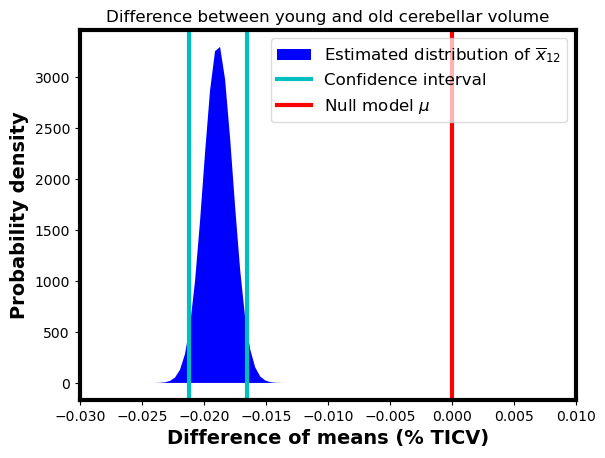

In [138]:
ciDistribution = t(df, loc=mean12, scale=se12)
x = np.linspace(-0.03, 0.01, 100)

fig, ax = plt.subplots()

aCI = ax.fill_between(x, ciDistribution.pdf(x)*10, facecolor='b')
yl = ax.get_ylim()
lCI = ax.axvline(ci[0], ymin=0, ymax=1, color='c')
ax.axvline(ci[1], ymin=0, ymax=1, color='c')
lNull = ax.axvline(0, ymin=0, ymax=1, color='r')

ax.set_xlim([min(x), max(x)])
ax.set_xlabel('Difference of means (% TICV)')
ax.set_ylabel('Probability density')
ax.set_title('Difference between young and old cerebellar volume')
ax.legend([aCI, lCI, lNull], ['Estimated distribution of $\overline{x}_{12}$', 'Confidence interval', 'Null model $\mu$'], \
    loc='best', fancybox=True, framealpha=0.7, fontsize=12)
plt.show()


## Two sample t test

### Get the $p$ value

Text(0.2, 0.5, '$p = 1.539e-38$')

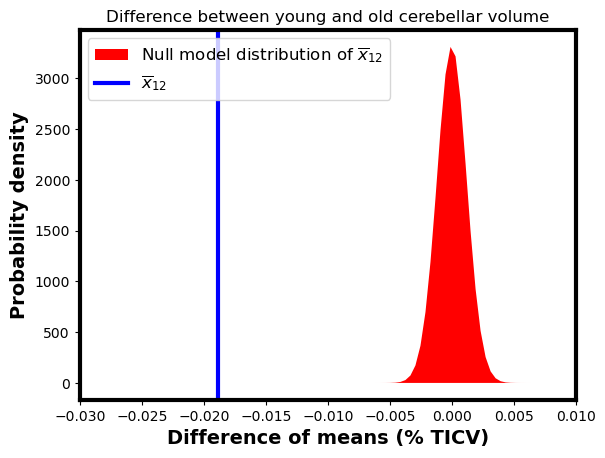

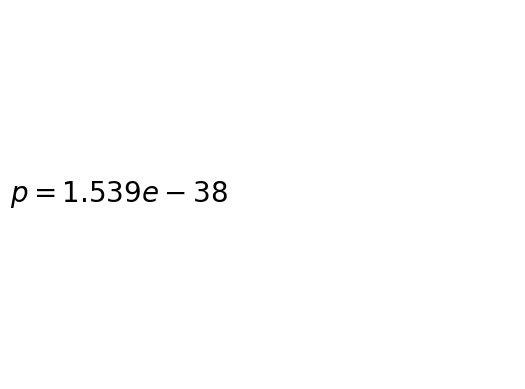

In [139]:
p = t.cdf(mean12/se12, df)

nullDistribution = t(df, loc=0, scale=se12)
x = np.linspace(-0.03, 0.01, 100)

fig1, ax1 = plt.subplots()
ax1.fill_between(x, nullDistribution.pdf(x)*10, facecolor='r', label='Null model distribution of $\overline{x}_{12}$')
ax1.get_ylim()
lmean = ax1.axvline(x=mean12, ymin=yl[0], ymax=yl[1], color='b', label='$\overline{x}_{12}$')

ax1.set_xlim([min(x), max(x)])
ax1.set_xlabel('Difference of means (% TICV)')
ax1.set_ylabel('Probability density')
ax1.set_title('Difference between young and old cerebellar volume')
ax1.legend(loc='upper left', fontsize=12)

fig2, ax2 = plt.subplots()
ax2.axis('off')
ax2.text(0.2, 0.5, f'$p = {p:.4}$', transform=ax2.transAxes, fontsize=20, fontweight='bold', ha='center', va='center')


## Power of the test

### Calculate the power

Percent significant: 1.0


Text(0.5, 1.0, 'N = 10; alpha = 0.01')

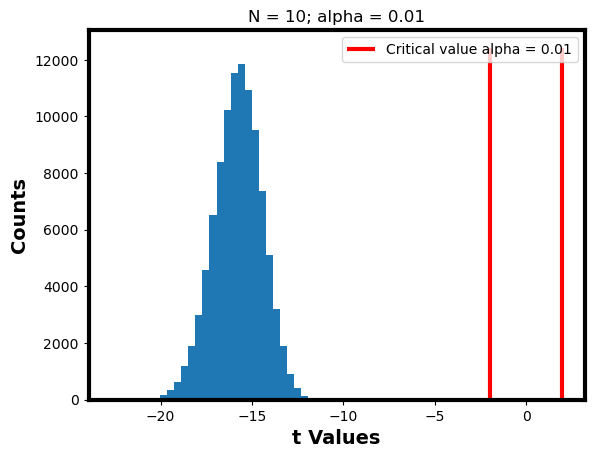

In [140]:
sigma1 = np.sqrt(v1)
sigma2 = np.sqrt(v2)
mu1 = mean1
mu2 = mean2
alpha = 0.05

numReps = 100000
sample1 = np.random.normal(mu1, sigma1, (N1, numReps))
sample2 = np.random.normal(mu2, sigma2, (N2, numReps))

sampleMean1 = np.mean(sample1, axis=0)
sampleMean2 = np.mean(sample2, axis=0)
sampleVar1 = np.var(sample1, ddof=1, axis=0)
sampleVar2 = np.var(sample2, ddof=1, axis=0)
SEM = np.sqrt(sampleVar1/N1 + sampleVar2/N2)

T = (sampleMean1 - sampleMean2) / SEM
TCrit = t.ppf(1 - (alpha/2), N1+N2-2)
TSig = np.abs(T) > TCrit
percentSig = np.sum(TSig) / numReps
print('Percent significant:', percentSig)

fig, ax = plt.subplots()
ax.hist(T, bins=30)
yl = ax.get_ylim()
ax.vlines([TCrit, -TCrit], [yl[0], yl[0]], [yl[1], yl[1]], colors='r', label='Critical value alpha = 0.01')
ax.set_xlabel('t Values')
ax.set_ylabel('Counts')
ax.legend()
ax.set_title('N = 10; alpha = 0.01')



### Power as a function of effect size

In [141]:
combinedSigma = np.sqrt( (v1*(N1-1)+v2*(N2-1)) / (N1+N2-2) )

numReps = 10000

allEffectSizes = np.linspace(0, 1, 100)
numEffectSizes = len(allEffectSizes)
percentSig = np.zeros(len(allEffectSizes))
for effectSizeNum in range(numEffectSizes):
    effectSize = allEffectSizes[effectSizeNum]

    mu1 = mean12 - effectSize*combinedSigma/2
    mu2 = mean12 + effectSize*combinedSigma/2
    sample1 = np.random.normal(mu1, combinedSigma, (N1, numReps))
    sample2 = np.random.normal(mu2, combinedSigma, (N2, numReps))

    sampleMean1 = np.mean(sample1, axis=0)
    sampleMean2 = np.mean(sample2, axis=0)
    sampleVar1 = np.var(sample1, ddof=1, axis=0)
    sampleVar2 = np.var(sample2, ddof=1, axis=0)
    VarComb = sampleVar1 + sampleVar2
    SEM = np.sqrt(sampleVar1/N1 + sampleVar2/N2)

    T = (sampleMean1 - sampleMean2)/SEM
    TCrit = t.ppf(1 - (alpha/2), N1+N2-2)
    TSig = np.abs(T) > TCrit
    percentSig[effectSizeNum] = np.sum(TSig) / numReps




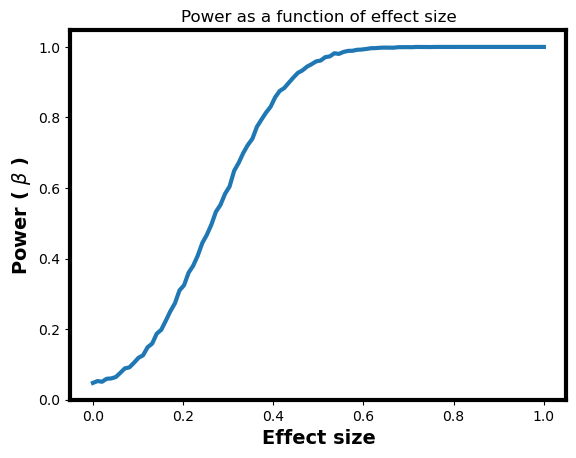

In [142]:
def effect_size_plot():
  fig, ax = plt.subplots()
  ax.plot(allEffectSizes, percentSig)
  yl = ax.get_ylim()
  xl = ax.get_xlim()
  ax.set_title('Power as a function of effect size')
  ax.set_xlabel('Effect size')
  ax.set_ylabel('Power ( $\\beta$ )')
  return ax

ax = effect_size_plot()

#### Calculate the effect size with the desired power

Text(0.35, 0.3, 'min effect size = 0.44')

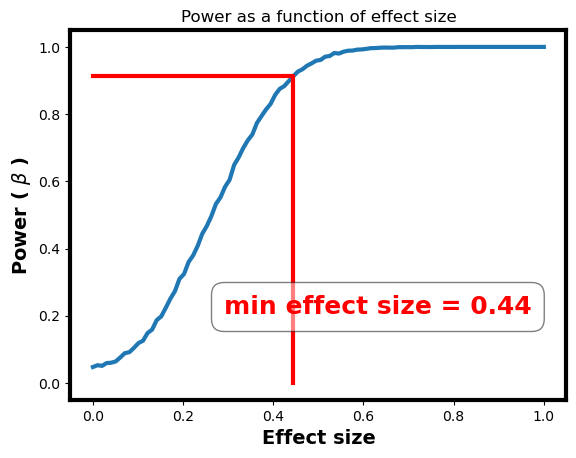

In [143]:
ax = effect_size_plot()

desiredPower = 0.9
minIndex = np.argmax(percentSig > desiredPower)
minEffectSize = allEffectSizes[minIndex]
minPower = percentSig[minIndex]

ax.plot([minEffectSize, minEffectSize, 0], [0, minPower, minPower], 'r')
ax.annotate(f'min effect size = {minEffectSize:.2f}', xy=(minEffectSize, minPower),
            xytext=(0.35, 0.3), textcoords='figure fraction',
            fontsize=18, fontweight='bold', color='r', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))


## Pre and post hoc power

### Pre hoc power

Calculate this for a medium sized effect

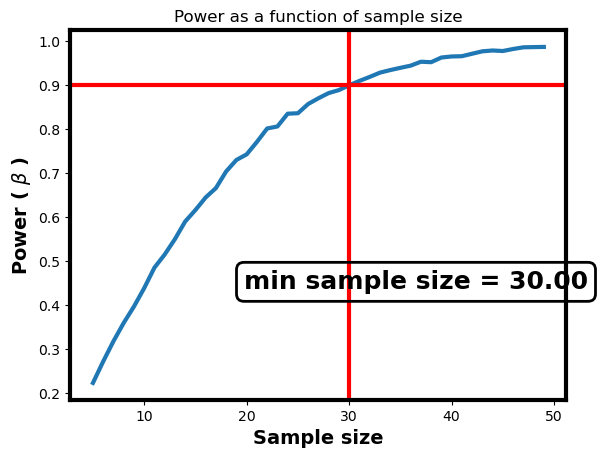

In [144]:
sigma1 = np.sqrt(v1)
sigma2 = np.sqrt(v2)
mu1 = mean1
mu2 = mean1 + 0.8*sigma1

allN = np.arange(5, 50)
numN = len(allN)
percentSig = np.zeros(numN)

for NNum in range(numN):
    N = allN[NNum]
    sample1 = np.random.normal(mu1, sigma1, (N, numReps))
    sample2 = np.random.normal(mu2, sigma2, (N, numReps))
    
    sampleMean1 = np.mean(sample1, axis=0)
    sampleMean2 = np.mean(sample2, axis=0)
    sampleVar1 = np.var(sample1, ddof=1, axis=0)
    sampleVar2 = np.var(sample2, ddof=1, axis=0)
    VarComb = sampleVar1 + sampleVar2
    SEM = np.sqrt(sampleVar1/N + sampleVar2/N)
    
    T = (sampleMean1 - sampleMean2) / SEM
    TCrit = t.ppf(1 - (alpha/2), 2*N-2)
    TSig = np.abs(T) > TCrit
    percentSig[NNum] = np.sum(TSig) / numReps

fig, ax = plt.subplots()
ax.plot(allN, percentSig)
yl = ax.get_ylim()
xl = ax.get_xlim()
ax.set_title('Power as a function of sample size')
ax.set_xlabel('Sample size')
ax.set_ylabel(r'Power ( $\it\beta$ )')

minIndex = np.argmax(percentSig >= 0.9)
minN = allN[minIndex]
minPower = percentSig[minIndex]

ax.axvline(minN, color='r')
ax.axhline(minPower, color='r')
ax.text(0.35, 0.3, f'min sample size = {minN:.2f}', transform=ax.transAxes, 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=2),
        fontweight='bold', fontsize=18)
plt.show()


## Why is power important?

### How sample size effects estimated effect size

Text(0, 0.5, 'Effect size')

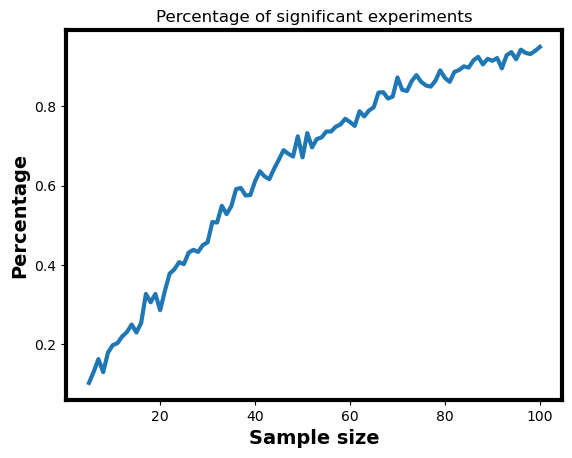

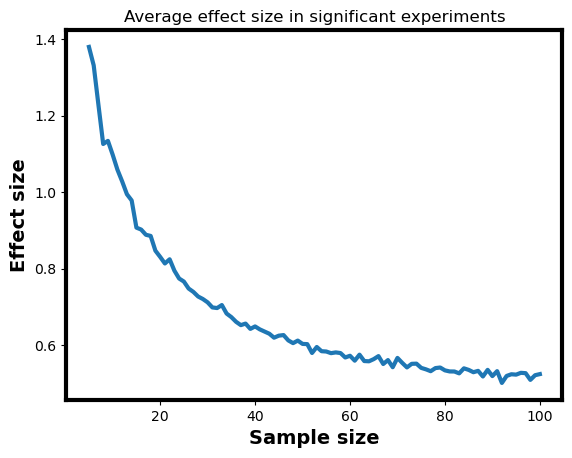

In [145]:
# Set up parameters
true_effect_size = 0.5
pop_size = 50000  # Population size
num_reps = 1000  # Number of experiments to run
alpha = 0.05  # Significance level

# Set up sample sizes to test
all_n = range(5, 101)

# Initialize arrays to store results
percent_sig = np.zeros_like(all_n, dtype=float)
avg_effect_size_sig = np.zeros_like(all_n, dtype=float)

# Simulate experiments
for i, n in enumerate(all_n):
    # Generate population data
    pop_data1 = np.random.normal(loc=0, scale=1, size=int(pop_size / 2))
    pop_data2 = np.random.normal(loc=true_effect_size, scale=1, size=int(pop_size / 2))

    # Run experiments
    sig_count = 0
    sig_effect_size_sum = 0
    for j in range(num_reps):
        # Generate samples
        sample1 = np.random.choice(pop_data1, size=n)
        sample2 = np.random.choice(pop_data2, size=n)

        # Calculate effect size and p-value
        effect_size = np.mean(sample2) - np.mean(sample1)
        _, p = ttest_ind(sample1, sample2, equal_var=True)

        # Determine if p-value is significant
        if p < alpha:
            sig_count += 1
            sig_effect_size_sum += effect_size

    # Calculate and store results
    percent_sig[i] = sig_count / num_reps
    if sig_count > 0:
        avg_effect_size_sig[i] = sig_effect_size_sum / sig_count

plt.figure()
plt.plot(all_n, percent_sig)
plt.title('Percentage of significant experiments')
plt.xlabel('Sample size')
plt.ylabel('Percentage')

plt.figure()
plt.plot(all_n, avg_effect_size_sig)
plt.title('Average effect size in significant experiments')
plt.xlabel('Sample size')
plt.ylabel('Effect size')

## One tailed tests

### Point null models and regions of equivalence

#### Point null model

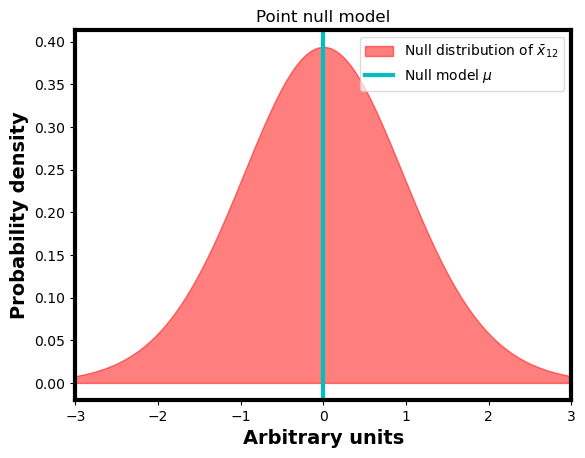

In [146]:
mu0 = 0
se0 = 1
df = 20

ar = mu0 + t.ppf([0.025, 0.975], df)*se0

arDistribution = t(df, mu0, se0)

x = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()

ax.fill_between(x, arDistribution.pdf(x), color='r', alpha=0.5, label='Null distribution of $\\bar{x}_{12}$')
ax.axvline(x=mu0, color='c', label='Null model $\\mu$')

ax.set_xlim([min(x), max(x)])

ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('Point null model')

plt.legend(loc='best', fancybox=True, framealpha=0.7)

plt.show()


#### Region of equivalence

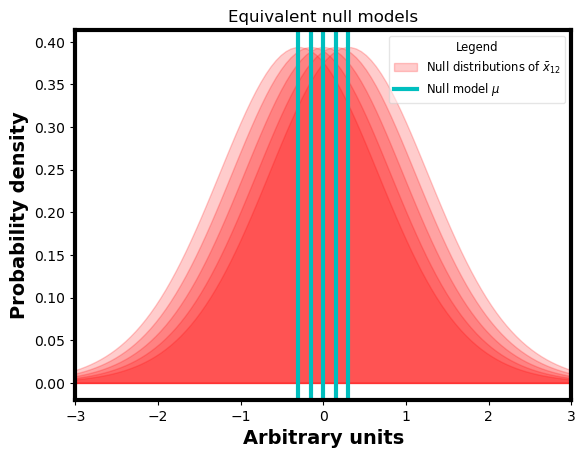

In [147]:
allMu0 = np.linspace(-0.3, 0.3, 5)
se0 = 1
df = 20

fig, ax = plt.subplots()

for mu0Num in range(len(allMu0)):
    mu0 = allMu0[mu0Num]

    ar = mu0 + t.ppf([0.025, 0.975], df)*se0

    arDistribution = t(df, mu0, se0)
    x = np.linspace(-3, 3, 100)

    aAR = ax.fill_between(x, arDistribution.pdf(x), color='r', alpha=0.2)
    lNull = ax.axvline(x=mu0, color='c')

ax.set_xlim([min(x), max(x)])
ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('Equivalent null models')
ax.legend([aAR, lNull], [
        'Null distributions of $\\bar{x}_{12}$', 
        'Null model $\\mu$'
    ], loc='best', fancybox=True, framealpha=0.5, fontsize='small',
    title_fontsize='small', title='Legend')


### One side equivalence region

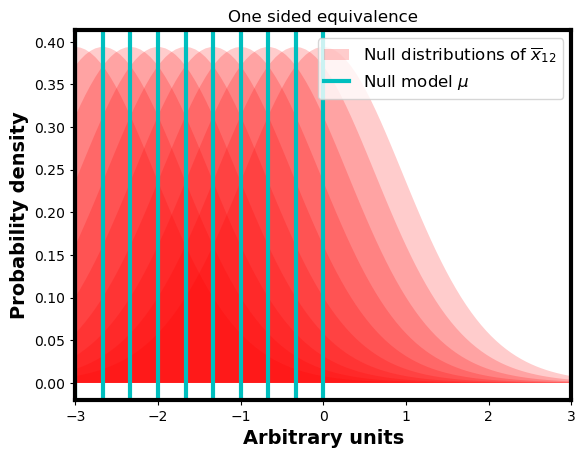

In [148]:
allMu0 = np.linspace(-3, 0, 10)
se0 = 1
df = 20

fig, ax = plt.subplots()
for mu0Num in range(len(allMu0)):
    mu0 = allMu0[mu0Num]

    ar = mu0 + t.ppf([0.025, 0.975], df)*se0

    arDistribution = t(df, mu0, se0)
    x = np.linspace(-3, 3, 100)

    aAR = ax.fill_between(x, arDistribution.pdf(x), alpha=0.2, facecolor='r')

for mu0Num in range(len(allMu0)):
    mu0 = allMu0[mu0Num]

    lNull = ax.axvline(x=mu0, color='c')

ax.set_xlim([np.min(x), np.max(x)])
ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('One sided equivalence')
ax.legend([aAR, lNull], ['Null distributions of $\overline{x}_{12}$', 'Null model $\mu$'], loc='upper right', fontsize=12, handlelength=1.5)
plt.show()


### Acceptance regions for equivalent null models

#### Point null model

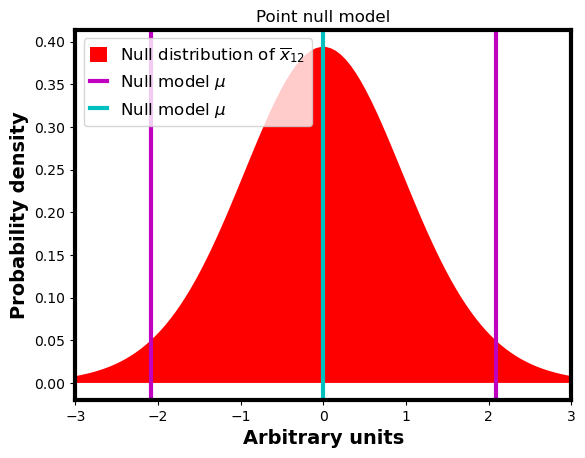

In [149]:
mu0 = 0
se0 = 1
df = 20

ar = mu0 + t.ppf([0.025, 0.975], df)*se0

arDistribution = t(df, loc=mu0, scale=se0)
x = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()

ax.fill_between(x, arDistribution.pdf(x), facecolor='r', label='Null distribution of $\overline{x}_{12}$')
ax.axvline(x=ar[0], color='m', label='Null model $\mu$')
ax.axvline(x=ar[1], color='m')
ax.axvline(x=mu0, color='c', label='Null model $\mu$')

ax.set_xlim([min(x), max(x)])
ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('Point null model')
ax.legend(loc='upper left',
    fontsize=12,
    handlelength=1,
    handleheight=1)


#### One sided null model

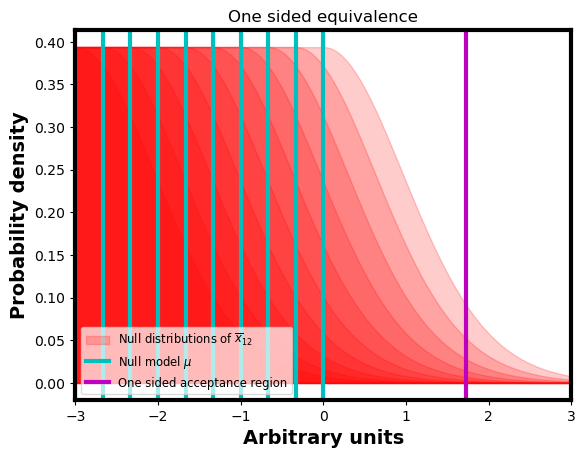

In [150]:
allMu0 = np.linspace(-3, 0, 10)
se0 = 1
df = 20

fig, ax = plt.subplots()

for mu0 in allMu0:
    arDistribution = t(df, mu0, se0)
    x = np.linspace(-3, 3, 100)
    
    posX = x[x >= mu0]
    arOneSided = (x < mu0) * arDistribution.pdf(posX[0]) + (x >= mu0) * arDistribution.pdf(x)
    aAR = ax.fill_between(x, arOneSided, alpha=0.2, color='r')
    
for mu0 in allMu0:
    lNull = ax.axvline(x=mu0, color='c')

ar = mu0 + t.ppf(0.95, df) * se0
lAR = ax.axvline(x=ar, color='m')

ax.set_xlim([min(x), max(x)])
ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('One sided equivalence')
ax.legend([aAR, lNull, lAR], 
          ['Null distributions of $\overline{x}_{12}$', 'Null model $\mu$', 'One sided acceptance region'], 
          loc='lower left', fontsize='small', fancybox=True, framealpha=0.7)

plt.show()
